<img style="float: left;" src="datas/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>December 1st, 2023</center>

---

# <center><ins>TP Class N°5 - Geometric Transformations</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 7 December 2023, 23h59**.
* The name of the file you upload should be **TP5_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP5_name_surname.zip**.

**General Advice:**

*When doing image processing and performing operations on pixels, it is a good practice to use float values for pixels with intensity [0,1].
Performing operations on uint8 encoded images can result in integer overflow and thus compute unpredictable values.*

## Exercise 1 : Image rotations

*(2 points)*

Import the RGB image : "mushroom.jpg".

(a) Using the geometric function *rotate* in the package *skimage.transform*, apply a $30°$ anticlockwise rotation to the image and a $100°$ clockwise rotation. Visualize all three images side-by-side.

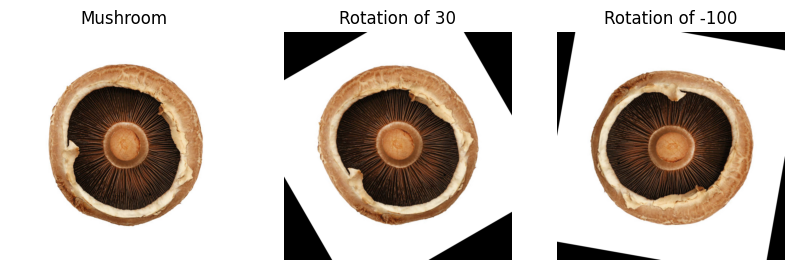

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

def open_image(source: str) -> np.ndarray:
    return sk.img_as_float32(plt.imread(source)) 

def print_image(image: np.ndarray, title: str = "Image", cmap='viridis'):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

def print_image_subplot(image: np.ndarray, title: str = "Image", cmap='viridis'):
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')

def MSE(img_1: np.ndarray, img_2: np.ndarray):
    return np.mean((sk.img_as_float32(img_1) - sk.img_as_float32(img_2))**2)

mushroom = open_image('./datas/mushroom.jpg')
rotate_1 = sk.transform.rotate(mushroom, 30)
rotate_2 = sk.transform.rotate(mushroom, -100)
plt.figure(figsize=(10, 10))
plt.subplot(131)
print_image_subplot(mushroom, "Mushroom")
plt.subplot(132)
print_image_subplot(rotate_1, "Rotation of 30")
plt.subplot(133)
print_image_subplot(rotate_2, "Rotation of -100")
plt.show()

(b) Explain the meaning of the parameters 'center' and 'resize' of the function. Comment the effects on the border. Explain it on your images.

The meaning of the parameters 'resize' is if the form of the image is automaticaly computed, so that the entire rotated output image exactly fits. Here are my tests below on this parameter.
We can see that if the parameter is set to false, we lost more information because the image is croped, whereas, with the parameter set to true, we keep all rotated datas of the image. So we lost information because of the rotation, but less than when the parameter is set to false. But the output image has a bigger shape.
So with resize parameter equals to false, the size of the original image will be kept, whereas with resize parameter equals to true, the size of the rotated image will be modified to don't crop the rotated image.

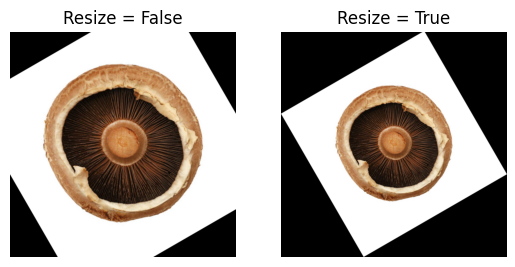

Shape of the original image
(612, 612, 3)
Shape of the image with resize = False
(612, 612, 3)
Shape of the image with resize = True
(836, 836, 3)


In [4]:
plt.figure()
plt.subplot(121)
print_image_subplot(sk.transform.rotate(mushroom, 30, resize=False), "Resize = False")
plt.subplot(122)
print_image_subplot(sk.transform.rotate(mushroom, 30, resize=True), "Resize = True")
plt.show()


print("Shape of the original image")
print(mushroom.shape)
print("Shape of the image with resize = False")
print(sk.transform.rotate(mushroom, 30, resize=False).shape)
print("Shape of the image with resize = True")
print(sk.transform.rotate(mushroom, 30, resize=True).shape)


The meaning of the center parameter is simply to identify the point around which the rotation will be applied. The default value is the center of the image. We have the results below:

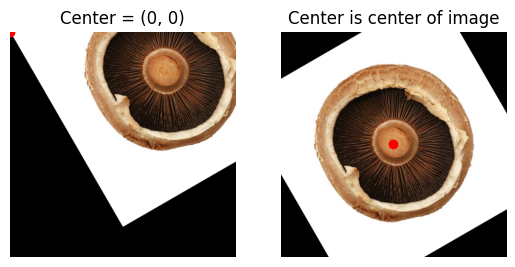

In [5]:
plt.figure()
plt.subplot(121)
plt.plot([0], [0], 'or')
print_image_subplot(sk.transform.rotate(mushroom, 30, center=(0, 0)), "Center = (0, 0)")
plt.subplot(122)
shape = mushroom.shape
plt.plot([shape[0]/2], [shape[1]/2], 'ro')
print_image_subplot(sk.transform.rotate(mushroom, 30),"Center is center of image")
plt.show()

So we can see that the red point is the point of visualization of the center parameter, and it coresponds to the point around which the rotation is applied.

(c) Starting with the original image :

* Apply a rotation of 10 ° to the image and repeat this operation 36 times (this will perform a full 360 ° rotation). Try different parameters ’order’ (=0,1,2,3). Visualize the original image and the results side-by-side.

* Compute MSE between the original image and the various results you obtained. **Hint :** Pay attention to the pixels you apply your MSE measure to, you may want to use a mask.

* What is the effect of the parameter 'order' ? How does it work ?

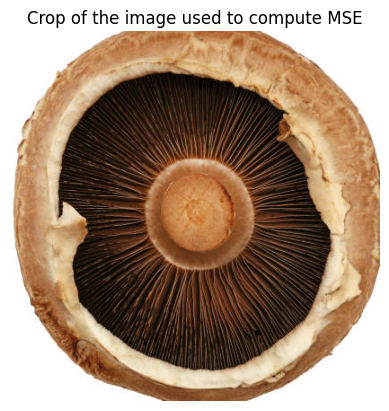

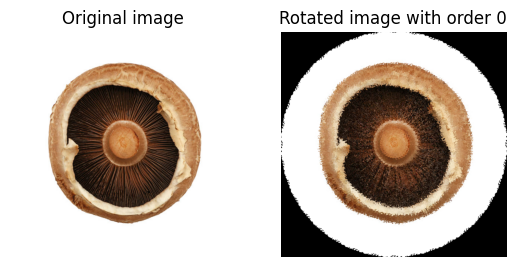

MSE between original and rotated image:
0.010424914


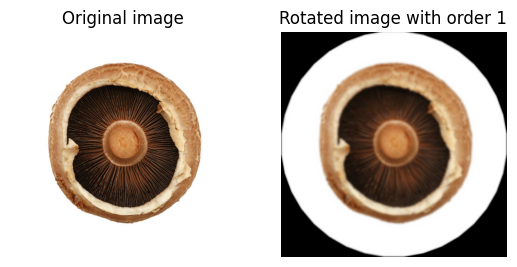

MSE between original and rotated image:
0.004397769


/home/darcy/.local/lib/python3.11/site-packages/skimage/transform/_warps.py:405: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  return warp(image, tform, output_shape=output_shape, order=order,


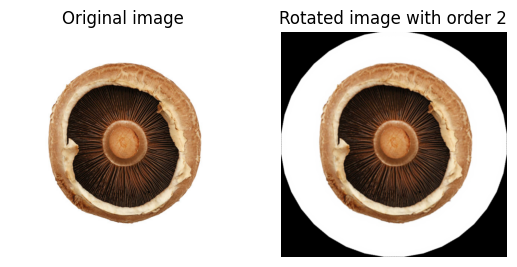

MSE between original and rotated image:
0.0012261998


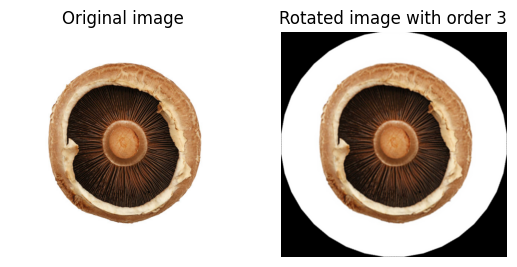

MSE between original and rotated image:
0.0017847965


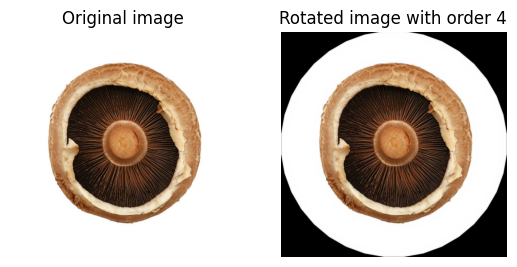

MSE between original and rotated image:
0.0006179713


In [19]:
def img_rotate_36(image: np.ndarray, order: int) -> np.ndarray:
    for i in range(36):
        image = sk.transform.rotate(image, 10, order=order)
    return image


print_image(mushroom[100:-100, 100: -100], "Crop of the image used to compute MSE")
for i in range(5):
    plt.figure()
    plt.subplot(121)
    print_image_subplot(mushroom, "Original image")
    plt.subplot(122)
    rotate_img = img_rotate_36(mushroom, i)
    print_image_subplot(rotate_img, f"Rotated image with order {i}")
    plt.show()
    print("MSE between original and rotated image:")
    print(MSE(mushroom[100:-100,100:-100], rotate_img[100:-100,100:-100]))

The effect of the order parameter is to vary the spline interpolation of each pixels: the pixel rotated can have bad coordinates values because coordinates must be integer and the rotation give us the position of the pixel rotated which is in most of case not an integer but a float, and we must determine which intensity must we put into this pixel to have the more good results...
That's why we make an interpolation to put intensity to a specific pixels, knowing that the neighbourgh pixels of the pixel, to have the best value.

In fact, we know the intensity of each pixel (w, z). Then whe want to compute the new position of this pixel. We have:

$$\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \begin{bmatrix} w \\ z \end{bmatrix}$$

And the matrix $A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}$ is a rotation matrix. The coordinate of $\begin{bmatrix} x \\ y \end{bmatrix}$ can be between two real coordinates of the discrete space...

So we known the intensity of pixels which aren't well placed (index can be floating values), and to have a good result, we determine which is the intensity of each pixel which are well placed (index are integer). To do that, we calculate the intensity of each pixel well placed, thanks to an interpolation. The parameter order give us the quality of the interpolation. So with order 0, we take the nearest neighbourg to make an interpolation. And then, we take the four nearest neighbourgh for the order 1, and so on...

So the execution time increase when we increase the quality of the interpolation (the order)... But when we increase the quality of the interpolation, we have a more beautifull image, which loses less informations compared to an image obtained with a less good interpolation.

## Exercise 2 : QR code reading
*(2 points)*

In this exercise, you will implement a simple QR code reader based on the image *QR_code_persp.jpg*

(a) Start by loading the image and convert it to grayscale. Visualize it. Locate the four corners of the QR code in pixel coordinates.

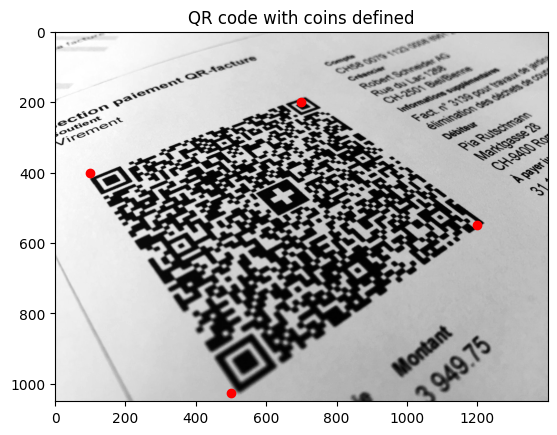

In [7]:
qr_code = open_image('./datas/QR_code_persp.jpg')

coins = np.array([
    [100, 400],
    [500, 1025],
    [1200, 550],
    [700, 200],
])

qr_code = sk.color.rgb2gray(qr_code)
plt.figure()
plt.title("QR code with coins defined")
plt.imshow(qr_code, cmap = 'gray')
plt.plot(100, 400, 'ro')
plt.plot(500, 1025, 'ro')
plt.plot(1200, 550, 'ro')
plt.plot(700, 200, 'ro')

(b) You now want to apply a projective transform to your QR code to have it squared and well-aligned.
To do this, you will use the class *ProjectiveTransform()* in the package *skimage.transform* (see an example [here](https://scikit-image.org/docs/dev/auto_examples/transform/plot_geometric.html#sphx-glr-auto-examples-transform-plot-geometric-py)).

* Use the method *estimate()* with a source shape $[[0, 0], [0, 610], [610, 610], [610, 0]]$
* Visualize the projective matrix which is stored in the params attribute of your ProjectiveTransform() object.
* Explain the meaning of the coefficients of this matrix.

In [8]:
transform = sk.transform.ProjectiveTransform()
transform.estimate([[0, 0], [0, 610], [610, 610], [610, 0]], coins)
print(transform.params)

[[ 1.32846343e+00  3.62694301e-01  1.00000000e+02]
 [-2.29338316e-01  4.23851185e-01  4.00000000e+02]
 [ 4.92652680e-04 -5.86086809e-04  1.00000000e+00]]


To make a modification to an image like a transformation, a rotation a scale or a shear, we use a matrix of transformation for each coordinate [x, y]. It give us the results below:

\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \times \begin{bmatrix} w \\ z \end{bmatrix}

But we can also make a translation of the image. And for it, we add simply to the coordinate a value. So we have:

\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} w \\ z \end{bmatrix} + \begin{bmatrix} b_{1} \\ b_{2} \end{bmatrix}

So we want to combine all this transformations into a matrix. We have $x = a_{11} \times w + a_{12} \times z + b_{1}$ and $y = a_{21} \times w + a_{22} \times z + b_{2}$.
The solution is to make the affine transformation below:

\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} a_{11}w + a_{12}z + b_1 \\ a_{21}w + a_{22}z + b_2 \end{bmatrix}

But we want to make also projective transform... So we have the coordinate of our pixel which must be normalized by something like this:

\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \frac{a_{11}w + a_{12}z + b_1}{c_{1}w + c_{2}z + 1} \\ \frac{a_{21}w + a_{22}z + b_2}{c_{1}w + c_{2}z + 1}\end{bmatrix}

So we calculate a transformation matrix like this:

\begin{bmatrix} \hat{x} \\ \hat{y} \\ p \end{bmatrix} = \begin{bmatrix} a_{11} & a_{12} & b_1 \\ a_{21} & a_{22} & b_2 \\ c_1 & c_2 & 1 \end{bmatrix} \times \begin{bmatrix} w \\ z \\ 1 \end{bmatrix}

and we have $\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \frac{\hat{x}}{p} \\ \frac{\hat{y}}{p} \end{bmatrix}$

This matrix allow us to make all the transformations.

But in matlab and python, we don't have this matrix... In fact, we have the transposed of this matrix, as show below:

$$\begin{bmatrix} x \\ y \\ p \end{bmatrix}^T = (\begin{bmatrix} a_{11} & a_{12} & b_1 \\ a_{21} & a_{22} & b_2 \\ c_1 & c_2 & 1 \end{bmatrix} \times \begin{bmatrix} w \\ z \\ 1 \end{bmatrix})^T

\Leftrightarrow \begin{bmatrix} x & y & p \end{bmatrix} = \begin{bmatrix} w \\ z \\ 1 \end{bmatrix}^T \times \begin{bmatrix} a_{11} & a_{12} & b_1 \\ a_{21} & a_{22} & b_2 \\ c_1 & c_2 & 1 \end{bmatrix}^T

\Leftrightarrow \begin{bmatrix} x & y & p \end{bmatrix} = \begin{bmatrix} w & z & 1 \end{bmatrix} \times \begin{bmatrix} a_{11} & a_{21} & c_1 \\ a_{12} & a_{22} & c_2 \\ b_1 & b_2 & 1 \end{bmatrix}
$$
So the $b_i$ parameters are used to make translation, the $c_j$ parameters are used to make projective transformation (used with the $a_{kl}$ parameters), and the $a_{kl}$ parameters are used to make the other transformations, and we can combine all this transformations to have complex transform

(c) Apply the projective transform to your image

* Use the function *warp()* from *skimage.transform* with you ProjectiveTransform object as argument.
* Visualize the transformed image.

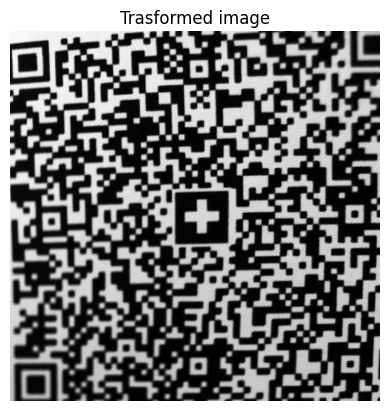

In [9]:
print_image(sk.transform.warp(qr_code, transform, output_shape=(610, 610)), "Trasformed image", 'gray')

(d) What further steps would you consider in order to program a QR code reader ?

-- your answer --

To program a QR code reader, we have first to detect corner of the qr code (because we make it manually, and it's not practical), and then we have a projective transformation to compute (we made it above), to have the qr code readable, and finally, we have to decode informations given by the qr code.

## Exercise 3 : Nearest interpolation
*(2 points)*

In this exercise, you will write a program that performs rescaling of images using nearest interpolation.

(a) Load the image 'lena.png' and convert it to grayscale. Perform a downsampling, taking one pixel every 3 horizontally and vertically.

Downsampled shape
(171, 171)


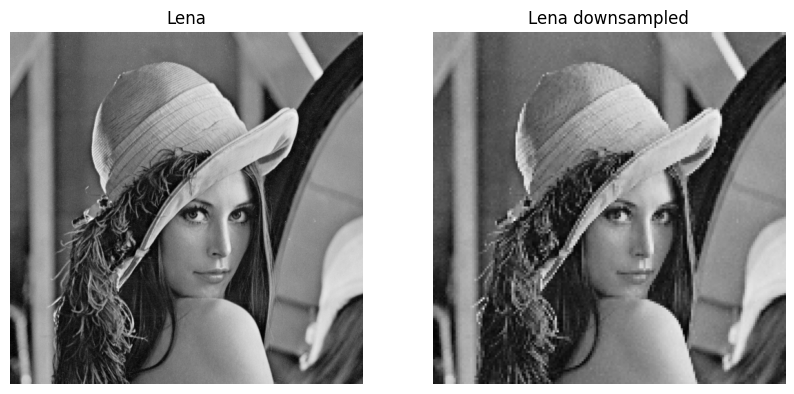

In [21]:
lena = sk.color.rgb2gray(open_image('./datas/lena.png'))
downsampling = lena[::3, ::3]
print("Downsampled shape")
print(downsampling.shape)
plt.figure(figsize=(10, 10))
plt.subplot(121)
print_image_subplot(lena, "Lena", 'gray')
plt.subplot(122)
print_image_subplot(downsampling, "Lena downsampled", 'gray')
plt.show()

(b) Write a function that performs resizing using the nearest interpolation and apply it to the downsampled image.

In [15]:
def resize_ni(img: np.ndarray, output_shape):
    """
    Changes the shape of the input image to match the output_shape

    Parameters
    ----------
    img : numpy array
        The input grayscale image

    output_shape : numpy array
        A couple of integers (x,y) giving the shape of the output image.

    Outputs
    ------
    resized : numpy array
        The image after the resizing algorithm. It should have shape output_shape.
    """
    output_shape = np.array(output_shape)
    scale = img.shape[:2] / output_shape
    row = np.round(np.arange(output_shape[0]) * scale[0]).astype(int).clip(0, img.shape[0] - 1)
    column = (np.arange(output_shape[1])* scale[1]).round().astype(int).clip(0, img.shape[1] - 1)
    
    resized = img[row[:, None], column]
    
    return resized

*Hint :* You may want to use *np.round()* to find the nearest-neighbouring point. Try not to use loops on pixels as this is veeeery slow.

(c) Apply the function *resize()* from *skimage.transform* with parameter 'order'=0. Visualize all three images (original, resize_ni and resize) side-by-side. Compute MSE between the original and the upscaled images. Comment your results.

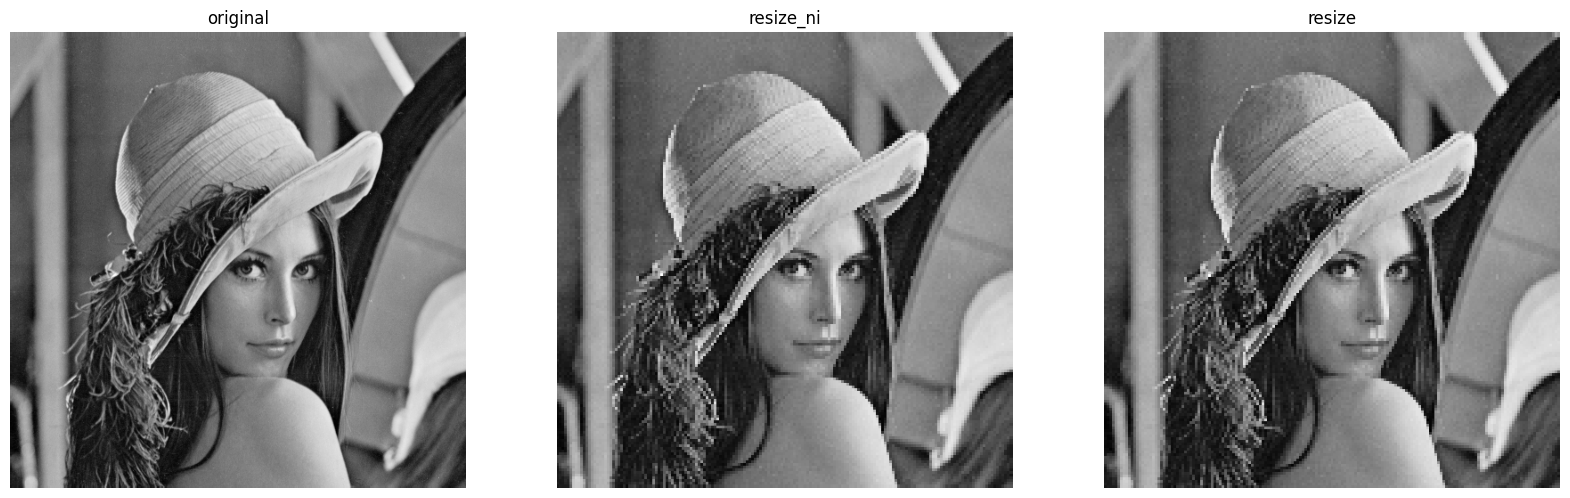

MSE between original image and image obtained with sk.transform.resize
0.0028510408

MSE between original image and image obtained with my function
0.002651321


In [18]:
plt.figure(figsize=(20, 20))

plt.subplot(131)
print_image_subplot(lena, "original", 'gray')

plt.subplot(132)
lena_myfunc_resized = resize_ni(downsampling, output_shape=(512, 512))
print_image_subplot(lena_myfunc_resized, "resize_ni", 'gray')

plt.subplot(133)
lena_resized = sk.transform.resize(downsampling, output_shape=(512, 512), order=0)
print_image_subplot(lena_resized, "resize", 'gray')

plt.show()

print("MSE between original image and image obtained with sk.transform.resize")
print(MSE(lena, lena_resized))
print("")
print("MSE between original image and image obtained with my function")
print(MSE(lena, lena_myfunc_resized))


We can see that the MSE distance between the original image and the image obtained with my function is approximatively equals to the MSE obtained with the resize function of skimage. So the function that we write is like the function resize() of skimage, with an interpolation of order 0.